## M11-L2 Problem 1

In this problem you will implement the elbow method using three different sklearn clustering algorithms: (`KMeans`, `SpectralClustering`, `GaussianMixture`). You will use the algorithms to find the number of natural clusters for two different datasets, one "blob" shaped dataset, and one concetric circle dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture

def plot_loss(loss, ax = None, title = None):
    if ax is None:
        ax = plt.gca()
    ax.plot(np.arange(2, len(loss)+2), loss, 'k-o')
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Loss')
    if title:
        ax.set_title(title)
    return ax

def plot_pred(x, labels, ax = None, title = None):
    if ax is None:
        ax = plt.gca()
    n_clust = len(np.unique(labels))
    for i in range(n_clust):
        ax.scatter(x[labels == i,0], x[labels == i,1], alpha = 0.5)
    ax.set_title(title)
    return ax

def compute_loss(x, labels):
    # Initialize loss
    loss = 0
    # Number of clusters
    n_clust = len(np.unique(labels))
    # Loop through the clusters
    for i in range(n_clust):
        # Compute the center of a given label
        center = np.mean(x[labels == i, :], axis = 0)
        # Compute the sum of squared distances between each point and its corresponding cluster center
        loss += np.sum(np.linalg.norm(x[labels == i, :] - center, axis = 1)**2)
    return loss


## Blob dataset

Visualize the "blob" dataset generated below, using a unique color for each cluster of points, where `y` contains the label of each corresponding point in `x`.

In [2]:
## DO NOT MODIFY
x, y = make_blobs(n_samples = 1000, n_features = 2, centers = [[0,0],[2,2],[1,-2],[4,0],[-2,-1],[-1,3]], cluster_std = [0.6,0.4,0.6,1.5,0.3,0.8], random_state = 0)

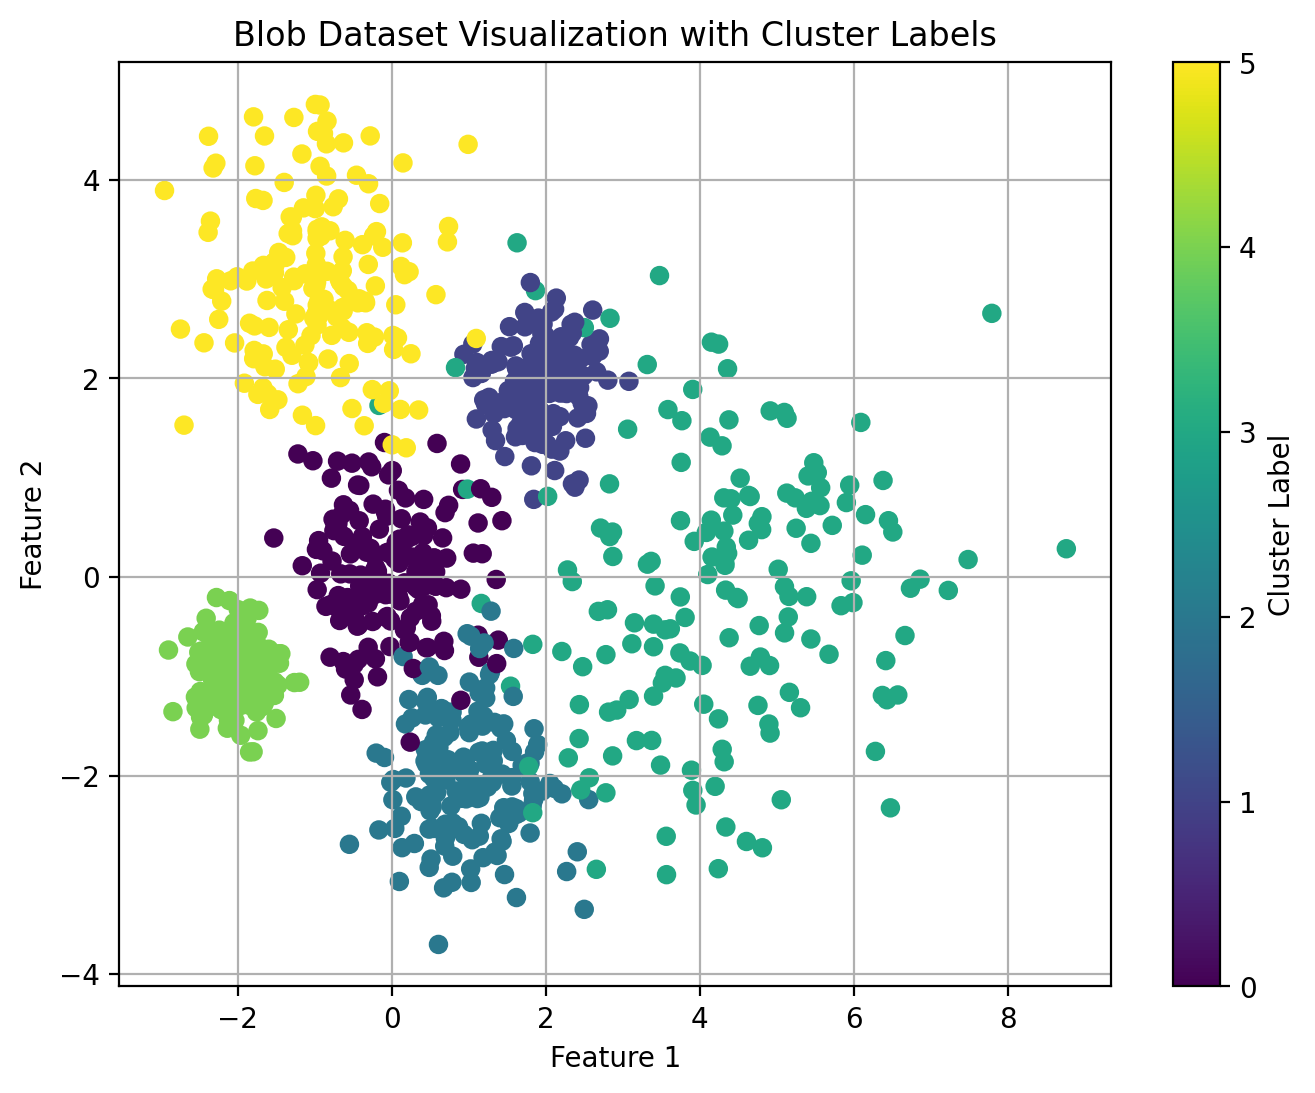

In [5]:
## YOUR CODE GOES HERE
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title('Blob Dataset Visualization with Cluster Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

Use the `sklearn` KMeans, Spectral Clustering, and Gaussian Mixture Model functions to cluster the "blob" data with 6 clusters, and modify the parameters until you get satisfactory results. Plot the results of your three models side-by-side using `plt.subplots` and the provided `plot_pred(x, labels, ax, title)` function.

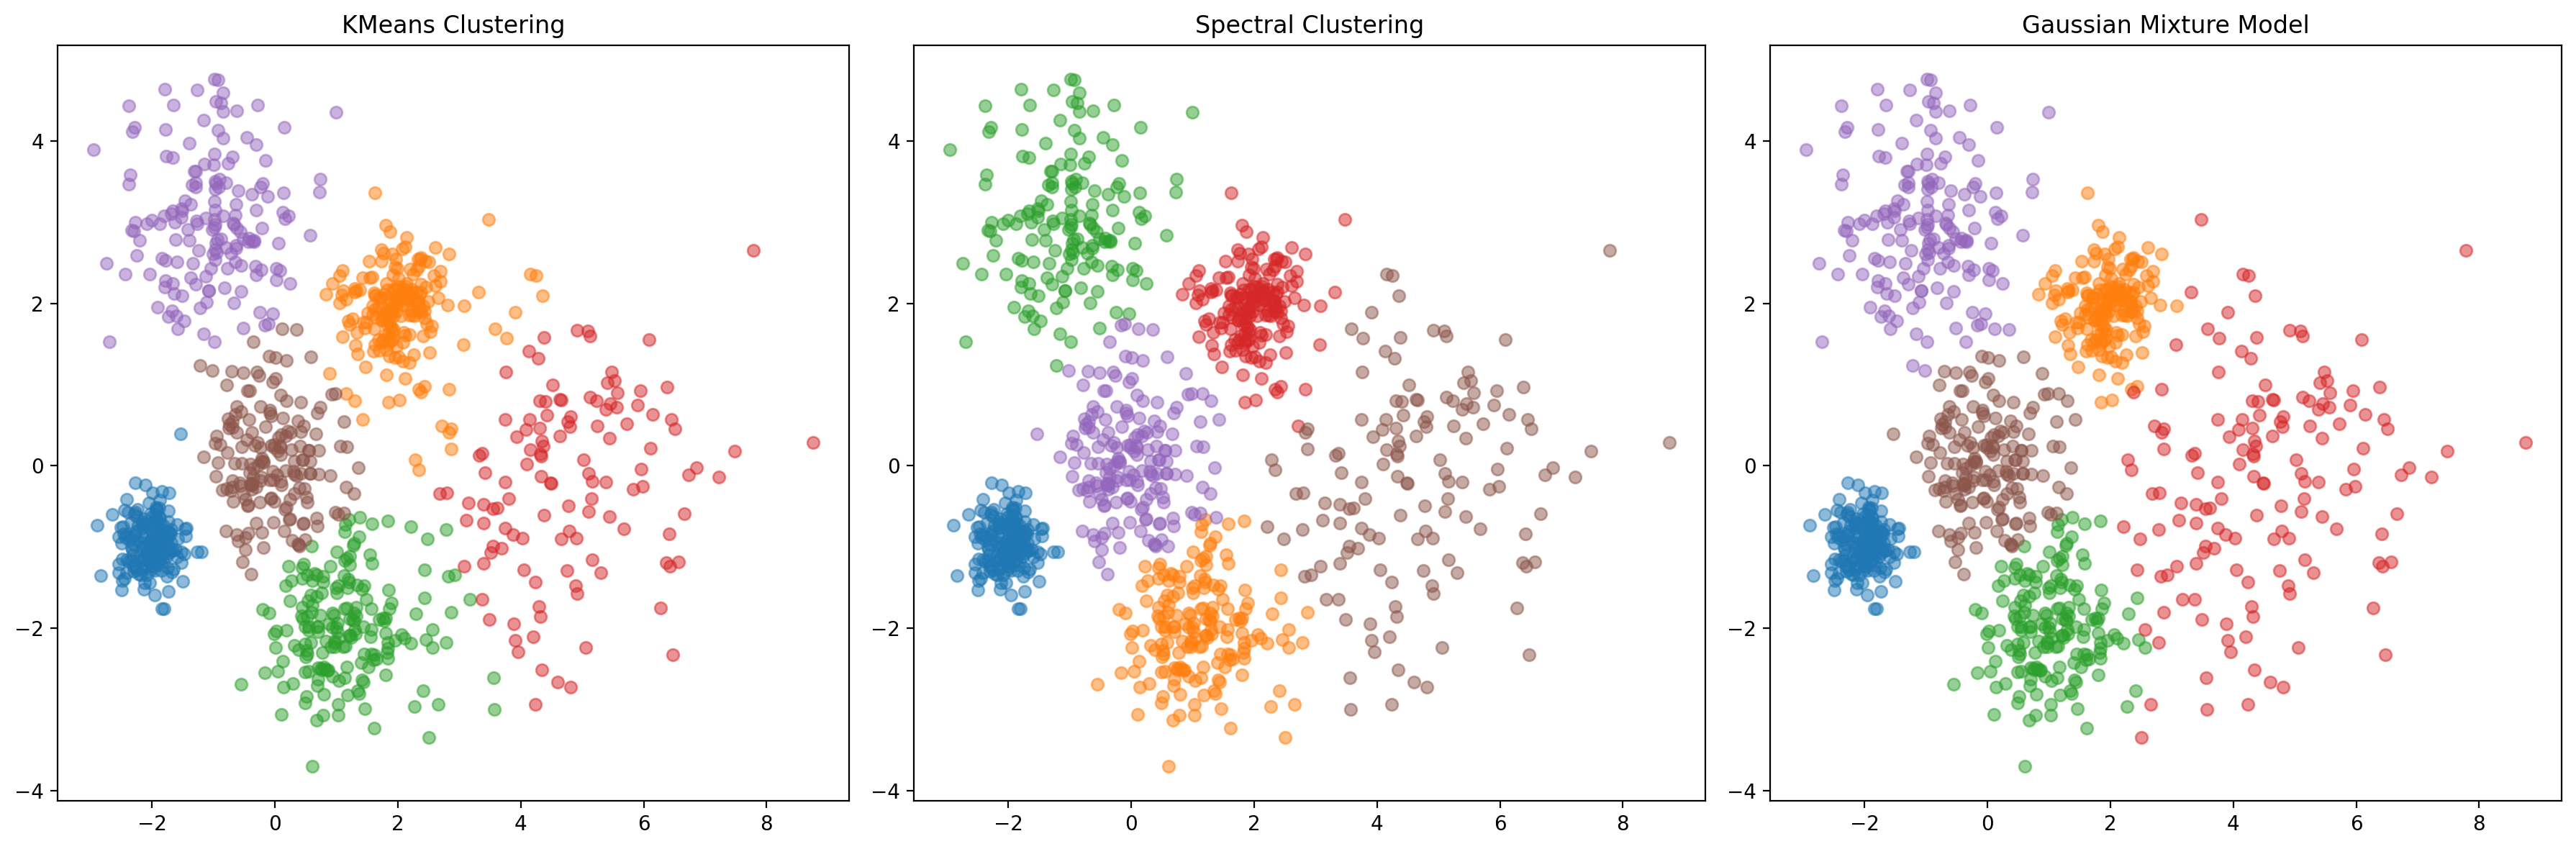

In [7]:
## YOUR CODE GOES HERE
kmeans = KMeans(n_clusters=6, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(x)

spectral = SpectralClustering(n_clusters=6, affinity='nearest_neighbors', random_state=0)
spectral_labels = spectral.fit_predict(x)

gmm = GaussianMixture(n_components=6, random_state=0)
gmm_labels = gmm.fit_predict(x)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
plot_pred(x, kmeans_labels, ax[0], 'KMeans Clustering')
plot_pred(x, spectral_labels, ax[1], 'Spectral Clustering')
plot_pred(x, gmm_labels, ax[2], 'Gaussian Mixture Model')
plt.tight_layout()
plt.show()

Using the parameters you found for the three models above, run each of the clustering algorithms for `n_clust = [2,3,4,5,6,7,8,9]` and compute the sum of squared distances loss for each case using the provided `compute_loss(x, labels)` function, where labels is the cluster assigned to each point by the algorithm. Plot loss versus number of cluster for each your three models in side-by-side subplots using the provided `plot_loss(x, labels, ax, title)` function.

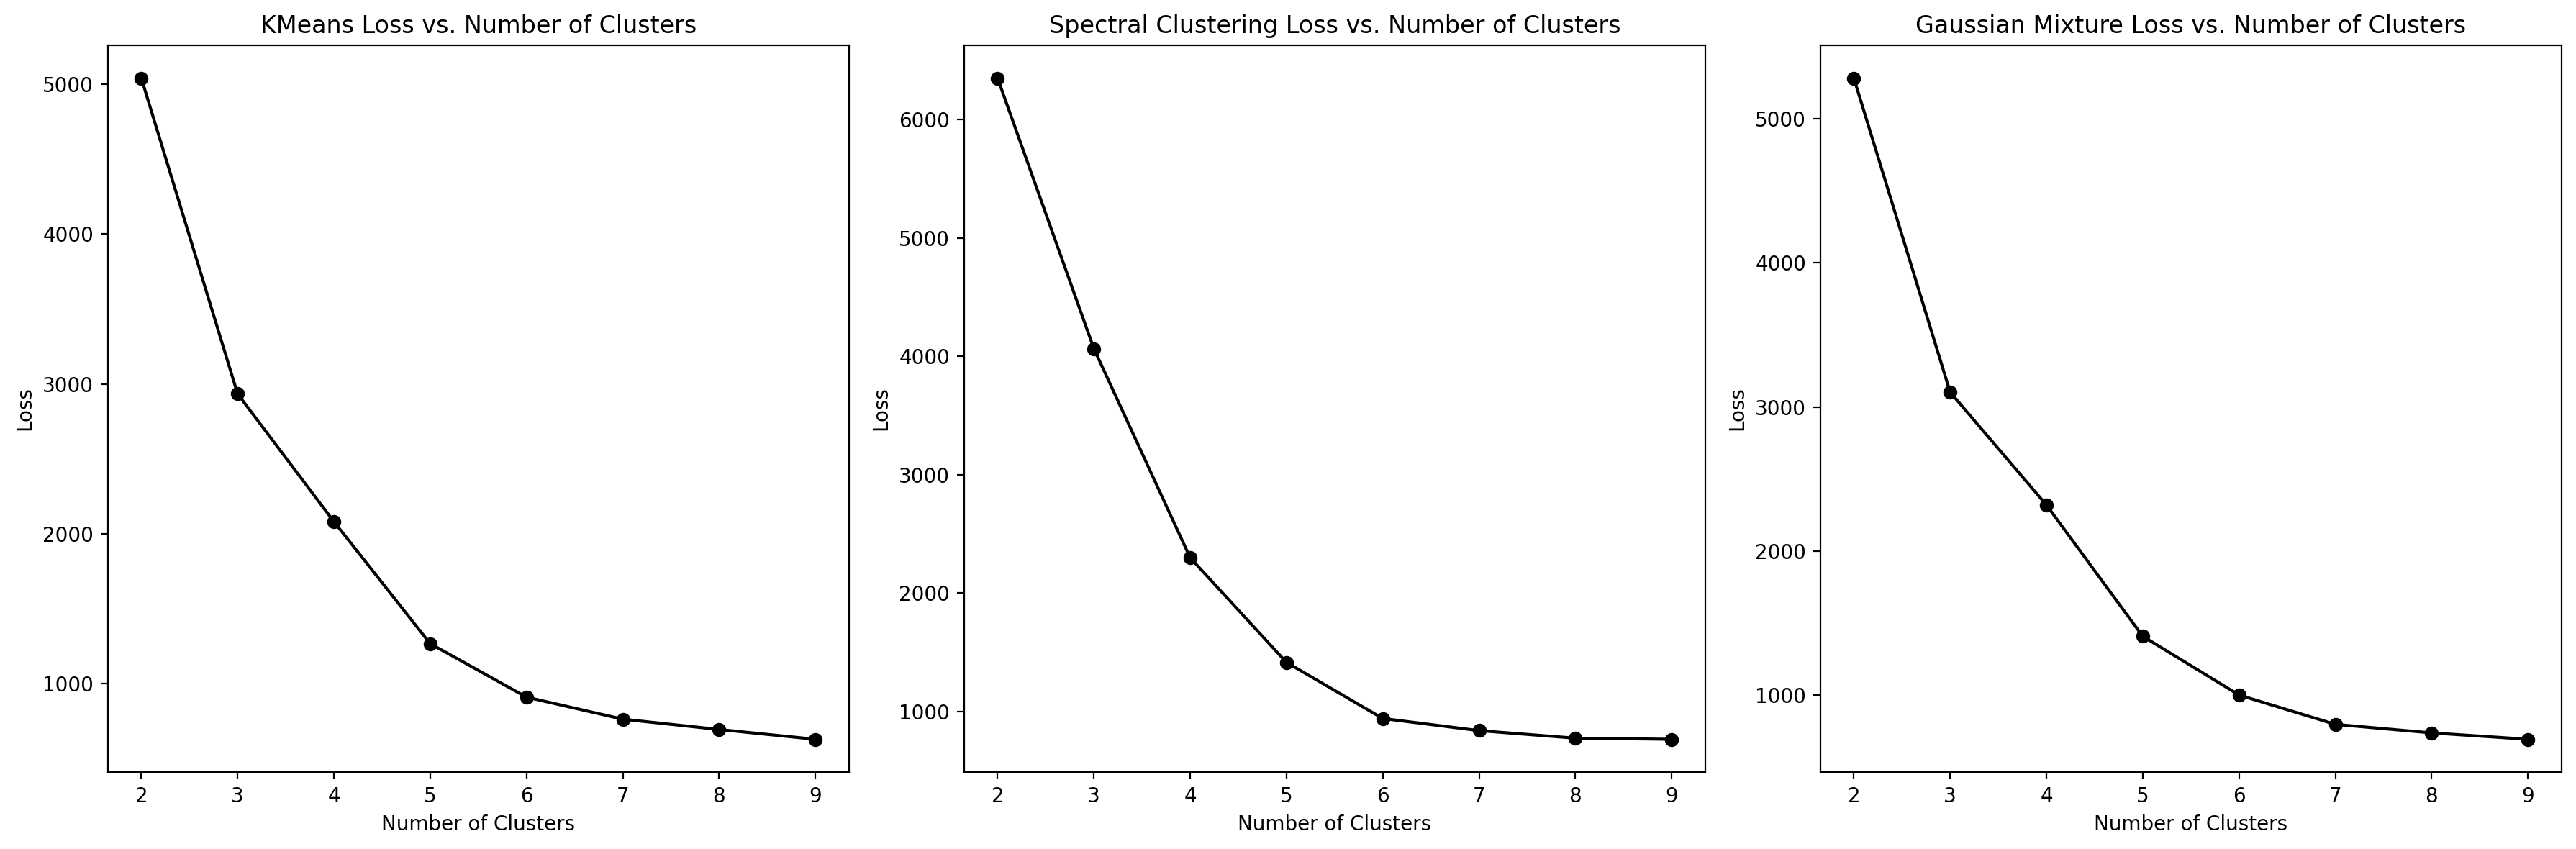

In [9]:
## YOUR CODE GOES HERE
n_clust = [2, 3, 4, 5, 6, 7, 8, 9]

kmeans_losses = []
spectral_losses = []
gmm_losses = []


for n in n_clust:
    kmeans = KMeans(n_clusters=n, n_init=10, random_state=0)
    kmeans_labels = kmeans.fit_predict(x)
    kmeans_loss = compute_loss(x, kmeans_labels)
    kmeans_losses.append(kmeans_loss)
    
    spectral = SpectralClustering(n_clusters=n, affinity='nearest_neighbors', random_state=0)
    spectral_labels = spectral.fit_predict(x)
    spectral_loss = compute_loss(x, spectral_labels)
    spectral_losses.append(spectral_loss)
    
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm_labels = gmm.fit_predict(x)
    gmm_loss = compute_loss(x, gmm_labels)
    gmm_losses.append(gmm_loss)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

plot_loss(kmeans_losses, ax=ax[0], title='KMeans Loss vs. Number of Clusters')
plot_loss(spectral_losses, ax=ax[1], title='Spectral Clustering Loss vs. Number of Clusters')
plot_loss(gmm_losses, ax=ax[2], title='Gaussian Mixture Loss vs. Number of Clusters')

plt.tight_layout()
plt.show()

## Concentric circles dataset
Visualize the "blob" dataset generated below, using a unique color for each cluster of points, where `y` contains the label of each corresponding point in `x`.

In [10]:
## DO NOT MODIFY
x1, y1 = make_circles(n_samples = 400, noise = 0.05, factor = 0.5, random_state = 0)
x2, y2 = make_circles(n_samples = 800, noise = 0.025, factor = 0.75, random_state = 1)

x = np.vstack([x1, x2*2])
y = np.hstack([y1, y2+2])

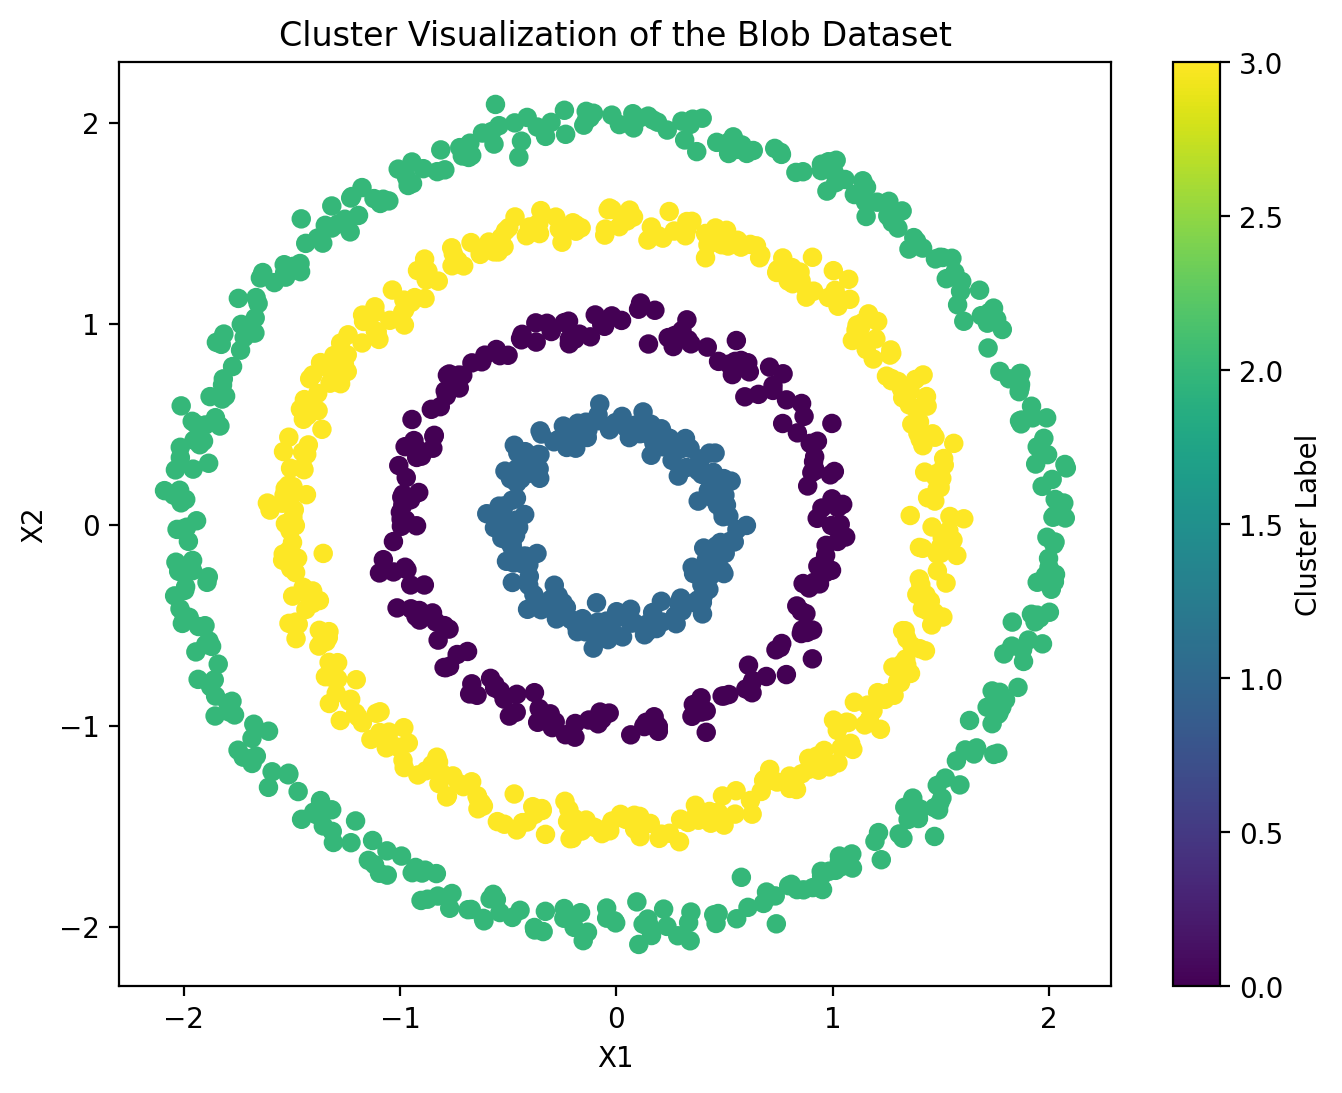

In [12]:
## YOUR CODE GOES HERE
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title('Cluster Visualization of the Blob Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

Use the `sklearn` KMeans, Spectral Clustering, and Gaussian Mixture Model functions to cluster the concentric circle data with 4 clusters, and attempt to modify the parameters until you get satisfactory results. Note: you should get good clustering results with Spectral Clustering, but the KMeans and GMM models will struggle to cluster this dataset well. Plot the results of your three models side-by-side using `plt.subplots` and the provided `plot_pred(x, labels, ax, title)` function.

c:\Users\barat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


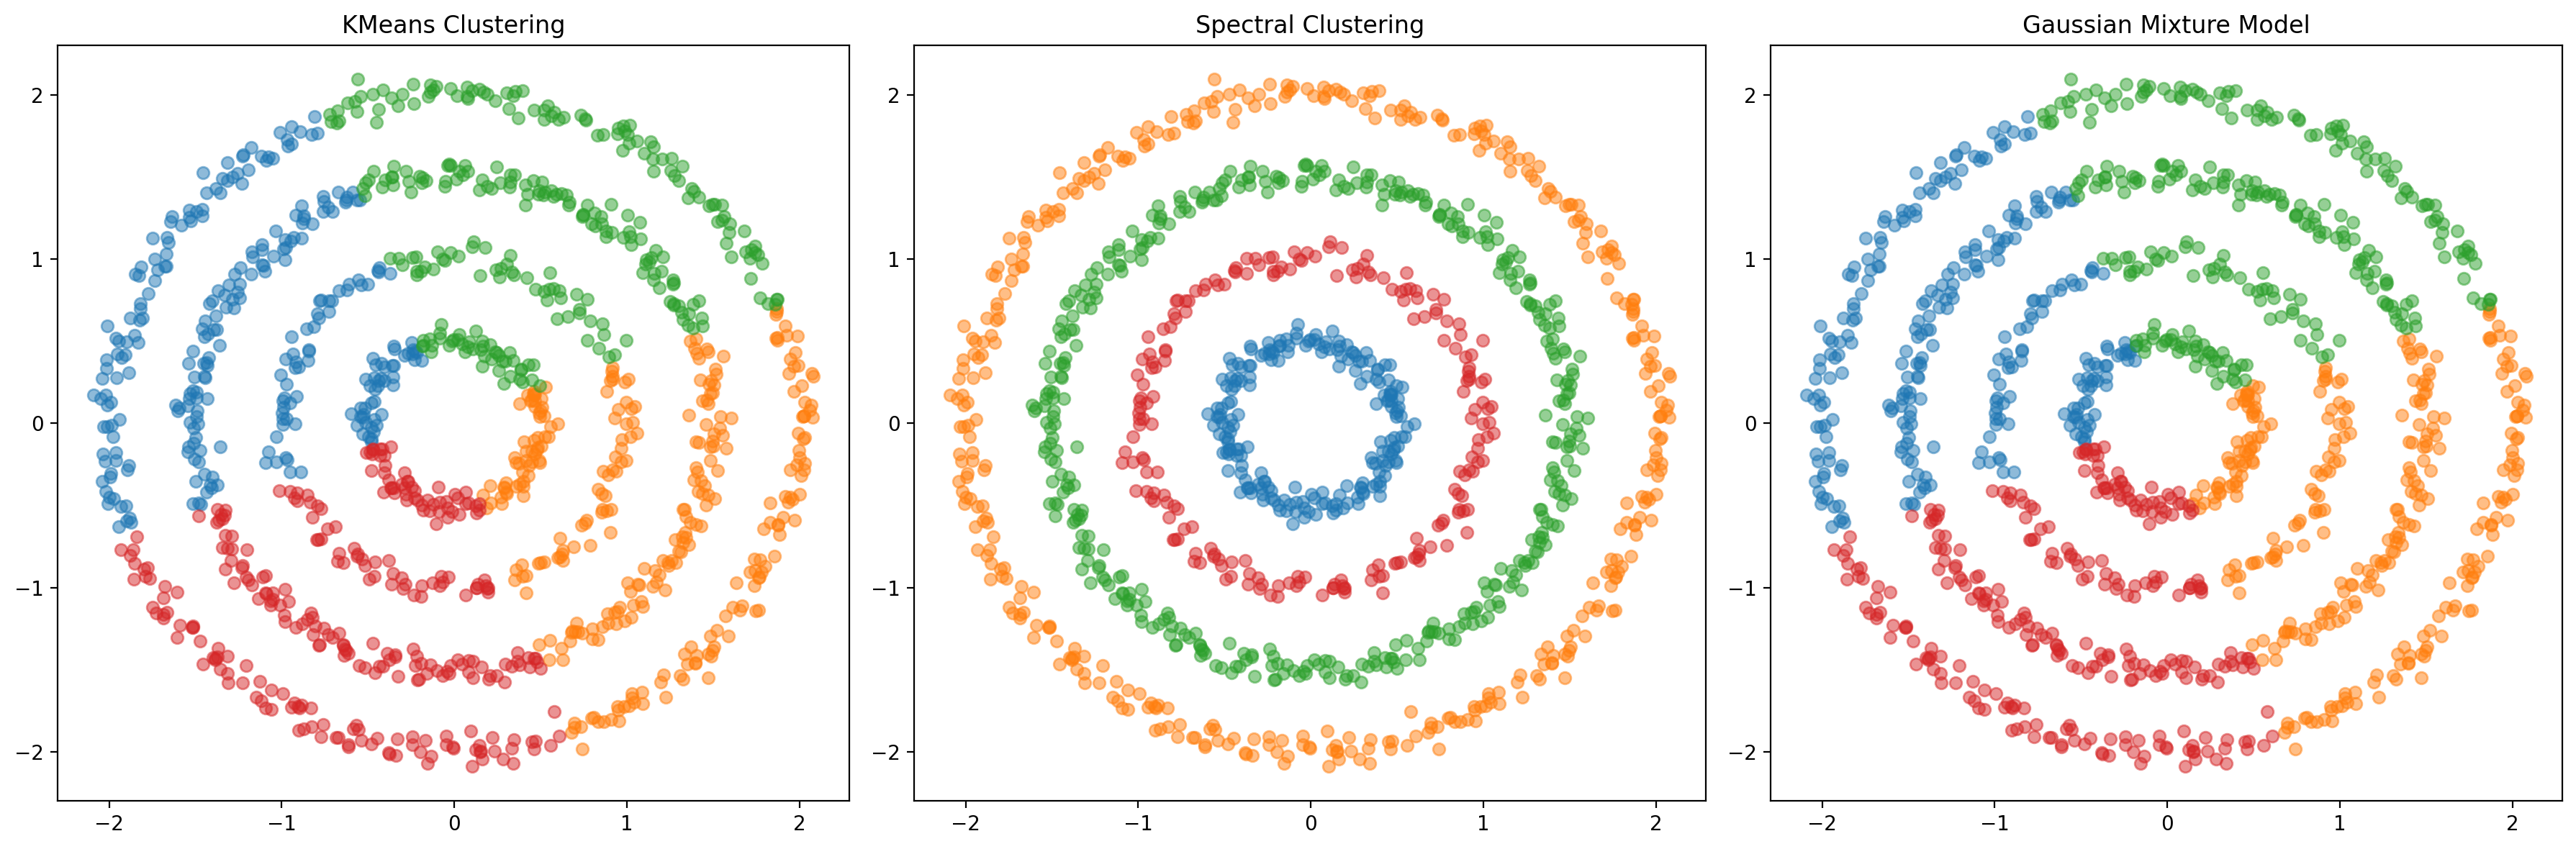

In [13]:
## YOUR CODE GOES HERE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(x)
plot_pred(x, kmeans_labels, axes[0], "KMeans Clustering")

spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=0)
spectral_labels = spectral.fit_predict(x)
plot_pred(x, spectral_labels, axes[1], "Spectral Clustering")

gmm = GaussianMixture(n_components=4, random_state=0)
gmm_labels = gmm.fit_predict(x)
plot_pred(x, gmm_labels, axes[2], "Gaussian Mixture Model")

plt.tight_layout()
plt.show()

Using the parameters you found for the three models above, run each of the clustering algorithms for `n_clust = [2,3,4,5,6,7,8,9]` and compute the sum of squared distances loss for each case using the provided `compute_loss(x, labels)` function, where labels is the cluster assigned to each point by the algorithm. Plot loss versus number of cluster for each your three models in side-by-side subplots using the provided `plot_loss(x, labels, ax, title)` function.

c:\Users\barat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\barat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\barat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\barat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\barat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embeddin

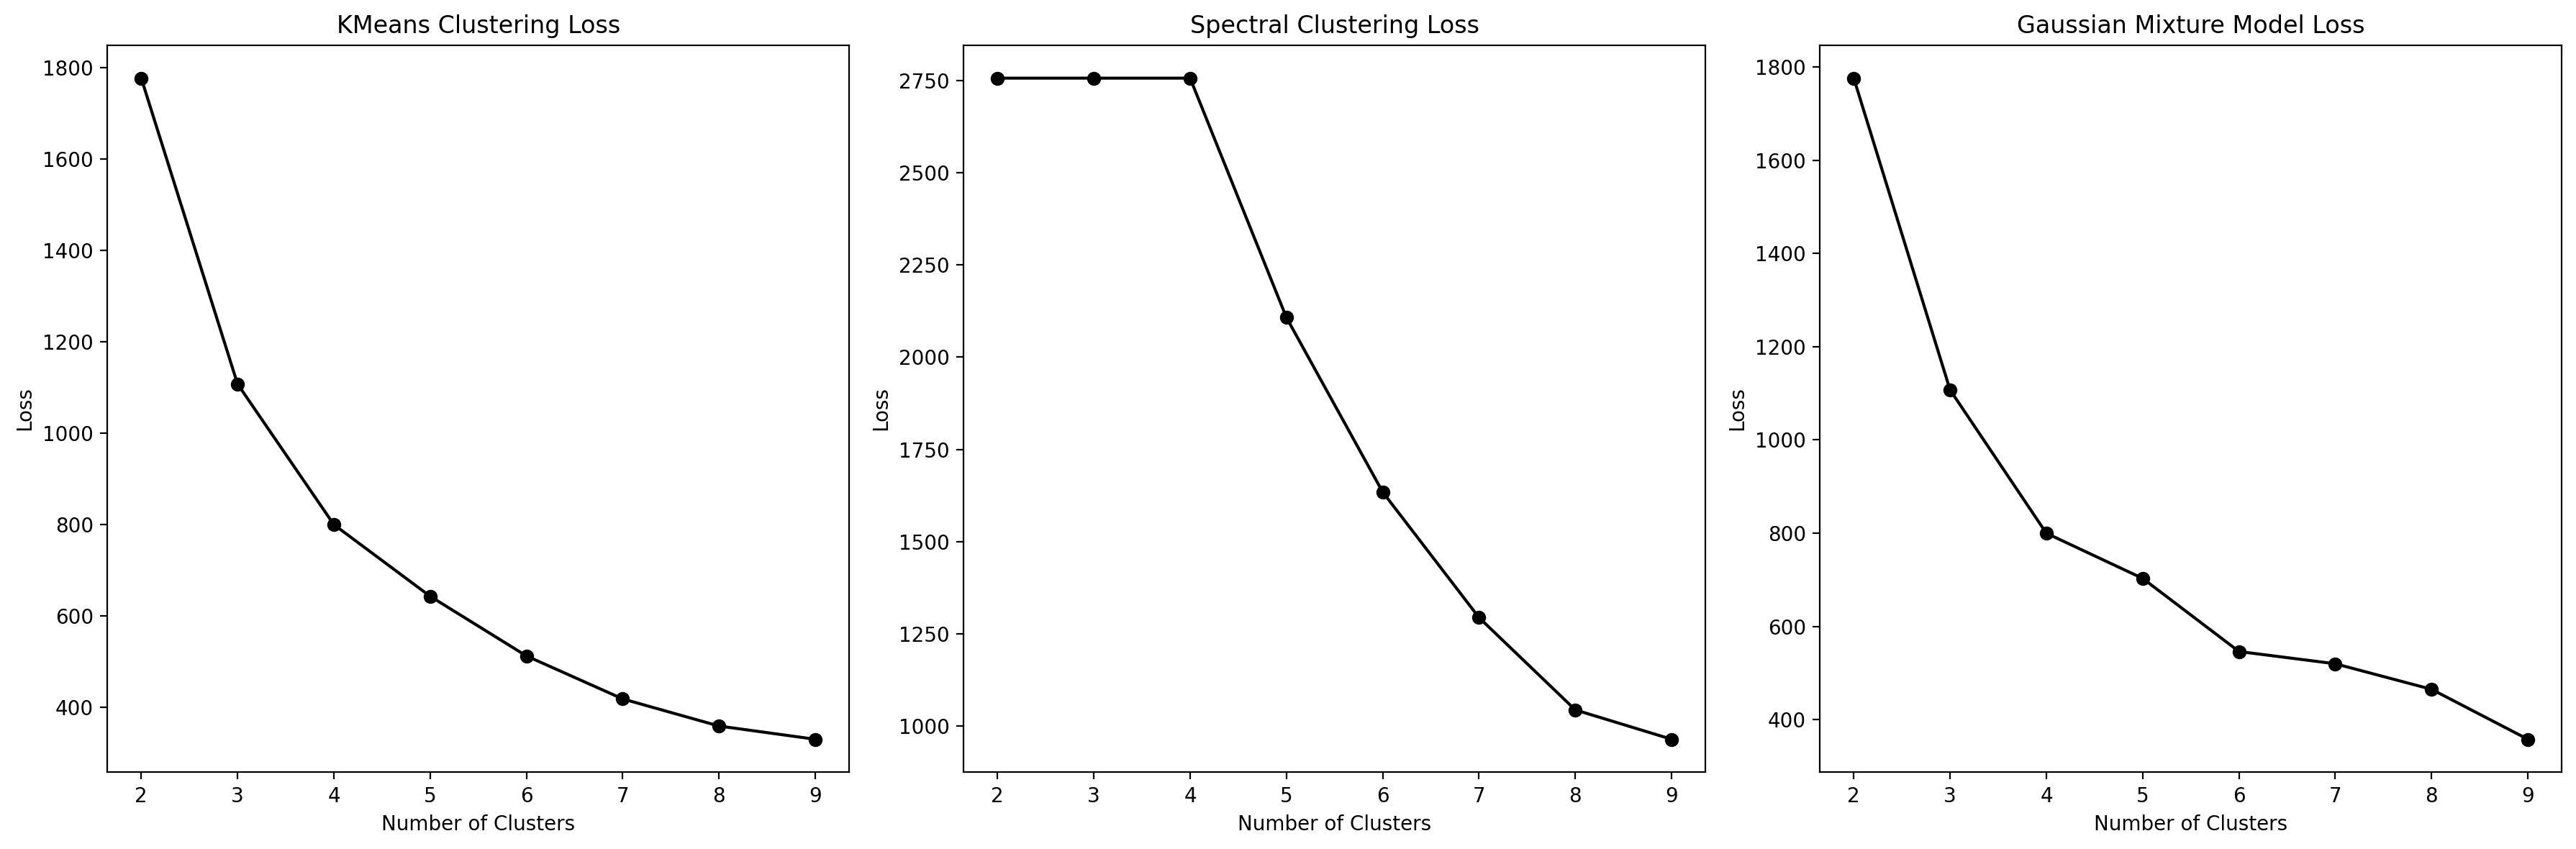

In [14]:
## YOUR CODE GOES HERE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

kmeans_losses = []
spectral_losses = []
gmm_losses = []

for n_clust in range(2, 10):
    kmeans = KMeans(n_clusters=n_clust, random_state=0)
    kmeans_labels = kmeans.fit_predict(x)
    kmeans_loss = compute_loss(x, kmeans_labels)
    kmeans_losses.append(kmeans_loss)
    
    spectral = SpectralClustering(n_clusters=n_clust, affinity='nearest_neighbors', random_state=0)
    spectral_labels = spectral.fit_predict(x)
    spectral_loss = compute_loss(x, spectral_labels)
    spectral_losses.append(spectral_loss)
    
    gmm = GaussianMixture(n_components=n_clust, random_state=0)
    gmm_labels = gmm.fit_predict(x)
    gmm_loss = compute_loss(x, gmm_labels)
    gmm_losses.append(gmm_loss)

plot_loss(kmeans_losses, axes[0], "KMeans Clustering Loss")
plot_loss(spectral_losses, axes[1], "Spectral Clustering Loss")
plot_loss(gmm_losses, axes[2], "Gaussian Mixture Model Loss")

plt.tight_layout()
plt.show()

## Discussion

1. Discuss the performance of the clustering algorithms on the "blob" dataset. Using the elbow method, were you able to identify the number of natural clusters in the dataset for each of the methods? Does the elbow method work better for some algorithms versus others?

KMeans works best for identifying the natural number of clusters with the elbow method on the "blob" dataset. The loss sharply drops and then levels off when the correct number of clusters is reached. The elbow method is less effective for Spectral Clustering and Gaussian Mixture Models in this case, as both algorithms may show less significant elbows due to the nature of their models. However, both still work well in clustering the data. The elbow method is highly effective for KMeans when clusters are spherical and well-separated, but for more complex datasets with irregular or non-convex clusters, the elbow method might be more ambiguous.

2. Discuss the performance of the clustering algorithms on the concentric circles dataset. Using the elbow method, were you able to identify the number of natural clusters in the dataset for each of the methods?

In conclusion, Spectral Clustering is the most effective algorithm for clustering the concentric circles dataset, and the elbow method works better for it than for KMeans or GMM. For non-convex datasets like concentric circles, algorithms that do not rely on convexity assumptions (like Spectral Clustering) tend to perform better.

Since KMeans is not suited to handle non-convex shapes, the loss will decrease slowly without a sharp drop that would indicate the optimal number of clusters. The elbow is not clearly identifiable, and the method does not provide reliable information for determining the natural number of clusters in concentric circles.

3. Does the sum of squared distances work well as a loss function for each of the three clustering algorithms we implemented? Does the sum of squared distance fail on certain types of clusters?

SSD works well for spherical, compact, and convex clusters, where the clusters are well-separated, and centroids can meaningfully represent the "center" of each cluster. For example, SSD works well for KMeans clustering on well-separated blob-like datasets. SSD fails on non-convex, irregular, or overlapping clusters, where the shape of the clusters deviates from a spherical or convex form.

KMeans: SSD works well for well-separated, convex, and spherical clusters, but it does not perform well on datasets with non-convex or complex shapes. The loss function does not account for non-linear relationships between points, making it unsuitable for datasets with more intricate structures.

Spectral Clustering: SSD is not the appropriate measure for assessing Spectral Clustering performance. Since Spectral Clustering operates based on graph-based similarities and does not assume spherical clusters, SSD fails to measure the true quality of the clustering when applied to non-convex data.

GMM: Although GMM does not directly rely on SSD, using SSD as an evaluation metric for GMM is still problematic for non-ellipsoidal clusters. GMM works better for capturing Gaussian-like clusters, and while SSD might somewhat capture cluster fit in such cases, it does not provide a robust measure for irregularly shaped clusters.